In [1]:
!pip install -U portalocker>=2.0.0

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [3]:
from torchvision import datasets

# Load the QMINST dataset

In [4]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load QMNIST train and test datasets
train_dataset = datasets.QMNIST(root='./data', what='train', download=True, transform=transform)
test_dataset = datasets.QMNIST(root='./data', what='test', download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9704059/9704059 [00:00<00:00, 104614865.66it/s]

Extracting ./data/QMNIST/raw/qmnist-train-images-idx3-ubyte.gz to ./data/QMNIST/raw


100%|██████████| 463024/463024 [00:00<00:00, 15099820.51it/s]

Extracting ./data/QMNIST/raw/qmnist-train-labels-idx2-int.gz to ./data/QMNIST/raw


100%|██████████| 9742279/9742279 [00:00<00:00, 54378583.67it/s]


Extracting ./data/QMNIST/raw/qmnist-test-images-idx3-ubyte.gz to ./data/QMNIST/raw


100%|██████████| 526800/526800 [00:00<00:00, 12865199.08it/s]

Extracting ./data/QMNIST/raw/qmnist-test-labels-idx2-int.gz to ./data/QMNIST/raw


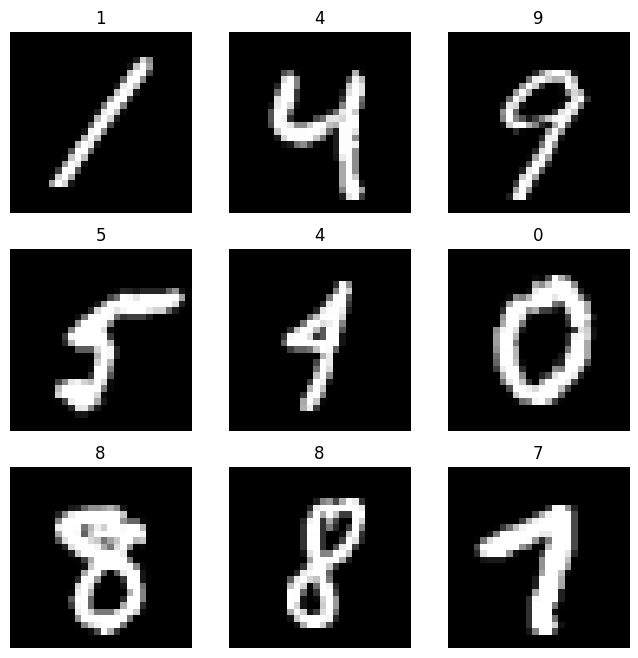

In [5]:
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

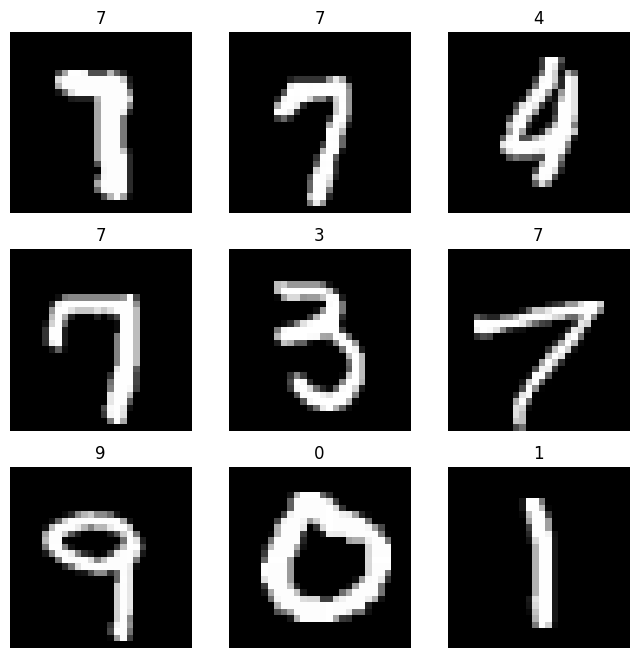

In [6]:
#Test DataSet
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_dataset), size=(1,)).item()
    img, label = test_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [7]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)  # QMNIST has 10 classes just like MNIST

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

model = MLP()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
#Tain the model with 5 epochs
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/5], Loss: 0.5108
Epoch [2/5], Loss: 0.0304
Epoch [3/5], Loss: 0.2863
Epoch [4/5], Loss: 0.0715
Epoch [5/5], Loss: 0.1564


#  Report on the results in terms of prediction accuracy on the train and test datasets

In [ ]:
#Evaluate the model on train data
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in train_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the QMNIST train images: {accuracy}%')

Accuracy of the model on the QMNIST train images: 97.44%


In [ ]:
#Evaluate the model on test data
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the QMNIST test images: {accuracy}%')


Accuracy of the model on the QMNIST test images: 96.47833333333334%


# Increase the current number of nodes in the layer to 256

#Hypothesize how it would change the performance results
After increasing the nodes to 256, the model may have a higher accuracy on the train dataset and test dataset. However, the model may also have a problem with overfitting. If overfitting occurs, the accuracy of test data will drop.

# Modify the model based on the chosen method and train

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)  # QMNIST has 10 classes just like MNIST

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

model2 = MLP()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=0.001)
#Tain the model with 10 epochs
num_epochs = 10

for epoch in range(num_epochs):
    model2.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model2(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 0.0129
Epoch [2/10], Loss: 0.0202
Epoch [3/10], Loss: 0.3471
Epoch [4/10], Loss: 0.1917
Epoch [5/10], Loss: 0.1739
Epoch [6/10], Loss: 0.0156
Epoch [7/10], Loss: 0.0008
Epoch [8/10], Loss: 0.0115
Epoch [9/10], Loss: 0.0048
Epoch [10/10], Loss: 0.0016


# Report on the results of the modified model and if it matches your hypothesis

In [ ]:
#Evaluate the model on train data
model2.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in train_loader:
        outputs = model2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the QMNIST train images: {accuracy}%')

Accuracy of the model on the QMNIST train images: 98.89333333333333%


In [ ]:
#Evaluate the model on test data
model2.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the QMNIST test images: {accuracy}%')

Accuracy of the model on the QMNIST test images: 97.145%


The accuracy of both train and test datasets increase which match my hypothesis.

# Experiment with different optimizers, loss functions, dropout, and activation functions, and observe the change in performance as you tune these hyperparameters.

# Change the optimizer to SGD

In [8]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)  # QMNIST has 10 classes just like MNIST

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

model2 = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model2.parameters(), lr=0.001)
#Tain the model with 5 epochs
num_epochs = 5

for epoch in range(num_epochs):
    model2.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model2(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/5], Loss: 2.2178
Epoch [2/5], Loss: 1.8506
Epoch [3/5], Loss: 1.3397
Epoch [4/5], Loss: 0.7753
Epoch [5/5], Loss: 0.7755


In [9]:
#Evaluate the model on test data
model2.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the QMNIST test images: {accuracy}%')

Accuracy of the model on the QMNIST test images: 82.42166666666667%


# Change the loss function to Focal Loss

In [11]:
class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, weight=None, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.weight = weight  # class weights, optional
        self.reduction = reduction
        self.ce_loss = nn.CrossEntropyLoss(weight=weight, reduction='none')  # Use none to apply reduction manually

    def forward(self, inputs, targets):
        logp = self.ce_loss(inputs, targets)
        p = torch.exp(-logp)
        loss = (1 - p) ** self.gamma * logp  # The modulating factor (1-p)^gamma * CE_loss

        if self.reduction == 'mean':
            return loss.mean()
        elif self.reduction == 'sum':
            return loss.sum()
        else:
            return loss


In [12]:
model2 = MLP()
criterion = FocalLoss(gamma=2.0)  # Experiment with different gamma values
optimizer = optim.Adam(model2.parameters(), lr=0.001)

num_epochs = 5

for epoch in range(num_epochs):
    model2.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model2(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')


Epoch [1/5], Loss: 0.1995
Epoch [2/5], Loss: 0.0841
Epoch [3/5], Loss: 0.0600
Epoch [4/5], Loss: 0.0481
Epoch [5/5], Loss: 0.0403


In [13]:
#Evaluate the model on test data
model2.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the QMNIST test images: {accuracy}%')

Accuracy of the model on the QMNIST test images: 96.63333333333334%


# With different Dropout

In [14]:
class MLPWithDropout(nn.Module):
    def __init__(self, dropout_rate=0.5):  # Default dropout rate set to 0.5
        super(MLPWithDropout, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(256, 64)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.dropout1(self.fc1(x)))
        x = torch.relu(self.dropout2(self.fc2(x)))
        return self.fc3(x)


In [18]:
def train(dataloader, model, criterion, optimizer):
    model.train()  # Set the model to training mode
    total_loss, total_correct, total = 0, 0, 0

    for batch, (images, labels) in enumerate(dataloader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Calculate statistics
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_correct += (predicted == labels).sum().item()
        total += labels.size(0)

    avg_loss = total_loss / len(dataloader)
    accuracy = 100 * total_correct / total
    print(f'Training - Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')


In [21]:
dropout_rates = [0.0, 0.2, 0.3, 0.4, 0.5]
for dropout_rate in dropout_rates:
    print(f"Training with dropout rate: {dropout_rate}")
    model = MLPWithDropout(dropout_rate=dropout_rate)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()


    # Train the model
    for epoch in range(num_epochs):
        train(train_loader, model, criterion, optimizer)  # Train function to be adapted


Training with dropout rate: 0.0
Training - Loss: 0.3717, Accuracy: 88.80%
Training - Loss: 0.1691, Accuracy: 94.83%
Training - Loss: 0.1238, Accuracy: 96.18%
Training - Loss: 0.0973, Accuracy: 97.02%
Training - Loss: 0.0828, Accuracy: 97.38%
Training with dropout rate: 0.2
Training - Loss: 0.4424, Accuracy: 86.35%
Training - Loss: 0.2214, Accuracy: 93.22%
Training - Loss: 0.1746, Accuracy: 94.65%
Training - Loss: 0.1498, Accuracy: 95.46%
Training - Loss: 0.1360, Accuracy: 95.83%
Training with dropout rate: 0.3
Training - Loss: 0.4983, Accuracy: 84.54%
Training - Loss: 0.2633, Accuracy: 92.21%
Training - Loss: 0.2170, Accuracy: 93.58%
Training - Loss: 0.1901, Accuracy: 94.31%
Training - Loss: 0.1748, Accuracy: 94.87%
Training with dropout rate: 0.4
Training - Loss: 0.5592, Accuracy: 82.70%
Training - Loss: 0.3110, Accuracy: 90.83%
Training - Loss: 0.2617, Accuracy: 92.42%
Training - Loss: 0.2396, Accuracy: 92.95%
Training - Loss: 0.2214, Accuracy: 93.60%
Training with dropout rate: 0.5


# With different activation fuctions

In [22]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x)) #Change the activation function to sigmoid
        return self.fc3(x)

model2 = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=0.001)
#Tain the model with 5 epochs
num_epochs = 5

for epoch in range(num_epochs):
    model2.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model2(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/5], Loss: 0.1394
Epoch [2/5], Loss: 0.1859
Epoch [3/5], Loss: 0.2029
Epoch [4/5], Loss: 0.0809
Epoch [5/5], Loss: 0.0387


In [23]:
#Evaluate the model on test data
model2.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the QMNIST test images: {accuracy}%')

Accuracy of the model on the QMNIST test images: 96.90666666666667%
